In [ ]:
@inproceedings{he2016deep,
  title={Deep residual learning for image recognition},
  author={He, Kaiming and Zhang, Xiangyu and Ren, Shaoqing and Sun, Jian},
  booktitle={Proceedings of the IEEE conference on computer vision and pattern recognition},
  pages={770--778},
  year={2016}
}

In [2]:
from pathlib import Path
import yaml 

with open('../paths.yml', 'r') as f:
    paths = yaml.safe_load(f)

DATA_PATH = Path(paths['DATA_PATH'])

In [3]:
from tensorflow.keras import layers, models, activations
import tensorflow as tf
from tensorflow.keras import utils
import numpy as np

2023-02-19 13:02:25.796119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 13:02:26.340751: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cudnn-linux-x86_64-8.6.0.163_cuda11-archive/lib:/usr/local/cuda-11.2/lib64
2023-02-19 13:02:26.340806: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cudnn-linux-x86_64-8.6.0.163_cuda11-archive/l

In [5]:
# basic residual block

identity = layers.Input((256, 256, 3))
x = layers.Conv2D(64, (1, 2), padding='same')(identity)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(3, (3, 3), padding='same')(x)
x = layers.BatchNormalization()(x)
out = layers.add([x, identity])

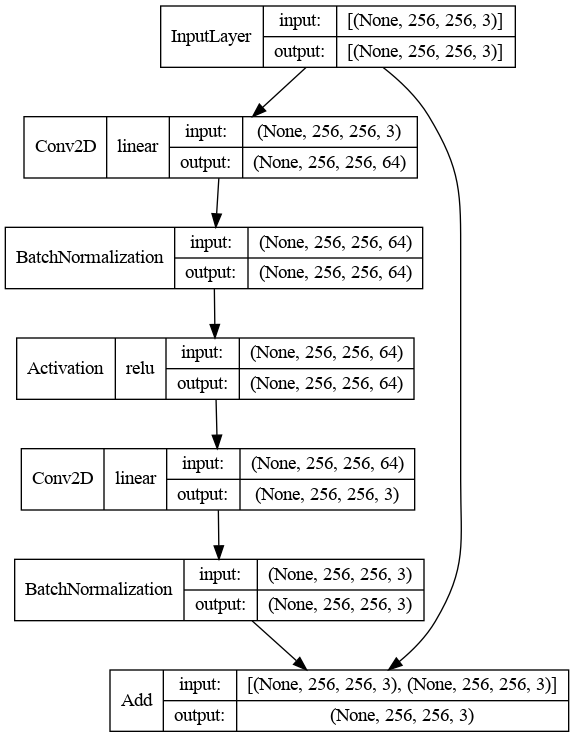

In [11]:
model = models.Model(inputs=identity, outputs=out)
utils.plot_model(model, show_layer_activations=True, show_layer_names=False, show_shapes=True)